In [87]:
# Import Dependencies 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image
from sklearn import tree



In [88]:
# Import data
file_path = "./Resources/mushrooms.csv"
df = pd.read_csv(file_path)
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [89]:
# Check the value counts

df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [90]:
# Check for nulls
null_values = df.isnull().sum()
print(null_values)


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [91]:
# Check all possible values
for column in df.columns:
    print(f"Column '{column}' unique values and counts:")
    print(df[column].value_counts())
    print("\n")

Column 'class' unique values and counts:
class
e    4208
p    3916
Name: count, dtype: int64


Column 'cap-shape' unique values and counts:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64


Column 'cap-surface' unique values and counts:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64


Column 'cap-color' unique values and counts:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64


Column 'bruises' unique values and counts:
bruises
f    4748
t    3376
Name: count, dtype: int64


Column 'odor' unique values and counts:
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64


Column 'gill-attachment' unique values and counts:
gill-attachment
f    7914
a     210
Name: count, dtype: int64


Column 'gill-spacing' unique values and counts:
gill-spacing
c    6812
w   

In [92]:
# Check data types

df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [93]:
# Seperate target variable 

y = df['class']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [94]:
# Features minus class

X = df.copy()
X = X.drop(columns='class')
X.head()

cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 22 columns]

In [95]:
# Split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [96]:
# Encode the class data

# Create instance of label encoder
le = LabelEncoder()

# Fit and transform the y training and testing data using the label encoder
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([1, 1, 0, ..., 0, 1, 0])

In [97]:
# Encode X train and test data with OneHotEncoder

# Create instance of OHE
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False, dtype='int')

X_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train), columns = ohe.get_feature_names_out())
X_test_encoded = pd.DataFrame(data=ohe.transform(X_test), columns=ohe.get_feature_names_out())
X_train_encoded


cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0               0            0            0            0            0   
1               0            0            1            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            1            0            0   
...           ...          ...          ...          ...          ...   
6088            0            0            0            0            0   
6089            0            0            0            1            0   
6090            0            0            1            0            0   
6091            0            0            0            1            0   
6092            0            0            0            1            0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0               1              0              0              1              0   
1               0              1              0              0              0   
2               1              0              0              0              1   
3               1              0              0              0              1   
4               0              0              0              0              1   
...           ...            ...            ...            ...            ...   
6088            1              0              0              0              1   
6089            0              0              0              0              1   
6090            0              0              0              0              1   
6091            0              0              0              1              0   
6092            0              1              0              0              0   

      ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0     ...             1             0             0          1          0   
1     ...             0             1             0          0          1   
2     ...             0             0             1          1          0   
3     ...             0             0             1          0          0   
4     ...             0             1             0          1          0   
...   ...           ...           ...           ...        ...        ...   
6088  ...             0             1             0          0          0   
6089  ...             0             0             0          0          0   
6090  ...             0             0             1          0          0   
6091  ...             0             1             0          0          0   
6092  ...             0             0             0          0          1   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0             0          0          0          0          0  
1             0          0          0          0          0  
2             0          0          0          0          0  
3             0          0          1          0          0  
4             0          0          0          0          0  
...         ...        ...        ...        ...        ...  
6088          0          0          1          0          0  
6089          0          0          0          0          1  
6090          0          0          1          0          0  
6091          0          0          1          0          0  
6092          0          0          0          0          0  

[6093 rows x 117 columns]

In [98]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression(random_state=1)

# Fit the model to the training data
lr_model.fit(X_train_encoded, y_train_encoded)

LogisticRegression(random_state=1)

In [99]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % lr_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % lr_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [100]:
# Create the support vector machine classifier model with a 'poly' kernel
svm_model = SVC(kernel='poly')

# Fit the model to the training data
svm_model.fit(X_train_encoded, y_train_encoded)

SVC(kernel='poly')

In [101]:
# Validate the model by checking the model accuracy with model.score


print('Train Accuracy: %.3f' % svm_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % svm_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [102]:
# Create the KNN model with 9 neighbors
knn_model = KNeighborsClassifier(n_neighbors=9)

# Fit the model to the training data
knn_model.fit(X_train_encoded, y_train_encoded)

KNeighborsClassifier(n_neighbors=9)

In [103]:
# Validate the model by checking the model accuracy with model.score

# Convert to NumPy arrays and ensure they are C-contiguous
X_train_encoded = np.ascontiguousarray(X_train_encoded)
y_train_encoded = np.ascontiguousarray(y_train_encoded)
X_test_encoded = np.ascontiguousarray(X_test_encoded)
y_test_encoded = np.ascontiguousarray(y_test_encoded)

print('Train Accuracy: %.3f' % knn_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % knn_model.score(X_test_encoded, y_test_encoded))

c:\Users\mckal\anaconda3\envs\AI\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train Accuracy: 1.000


c:\Users\mckal\anaconda3\envs\AI\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 1.000


In [104]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_encoded, y_train_encoded)

DecisionTreeClassifier()

In [105]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % dt_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % dt_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [106]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(n_estimators=128, random_state=1)

In [107]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % rf_model.score(X_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % rf_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


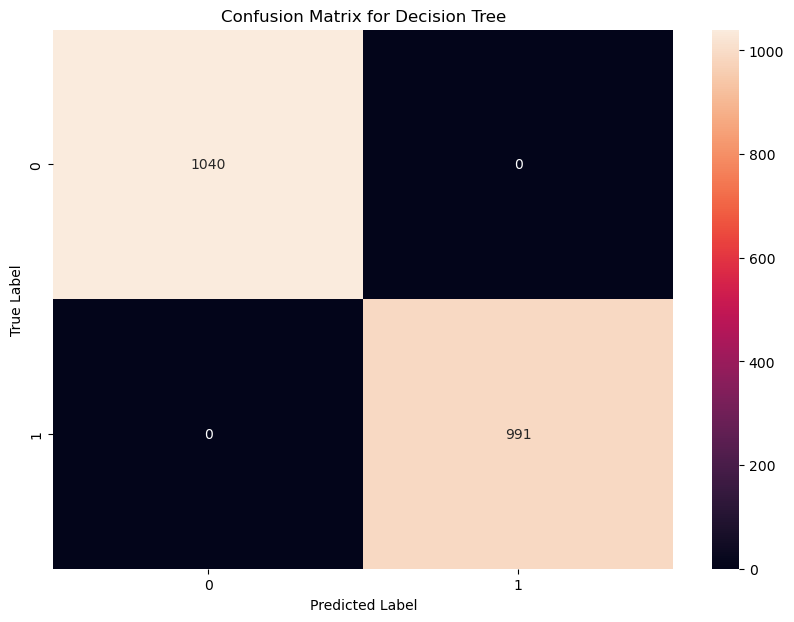

In [108]:
# Predicting the Test set results
predictions = dt_model.predict(X_test_encoded)

# Making the Confusion Matrix
cm_dt = confusion_matrix(y_test_encoded, predictions)

# Plotting the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_dt, annot=True, fmt="d")
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [109]:
# Classification report on decision tree
print(classification_report(y_test_encoded, predictions, labels = [1, 0]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       991
           0       1.00      1.00      1.00      1040

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [110]:
# Predict values with probabilities
pred_probas = dt_model.predict_proba(X_test_encoded)

# Print the probabilities
pred_probas

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [111]:
# Each prediction includes a prediction for both the 0 class and the 1 class
# We only need the predictions for the 1 class; use a list comprehension to 
# gather the second value from each list

pred_probas_firsts = [prob[1] for prob in pred_probas]

# Print the first 5 probabilities
pred_probas_firsts[0:5]

[0.0, 1.0, 1.0, 0.0, 1.0]

In [112]:
# Calculate the roc_auc_score
print(roc_auc_score(y_test_encoded, pred_probas_firsts))

1.0


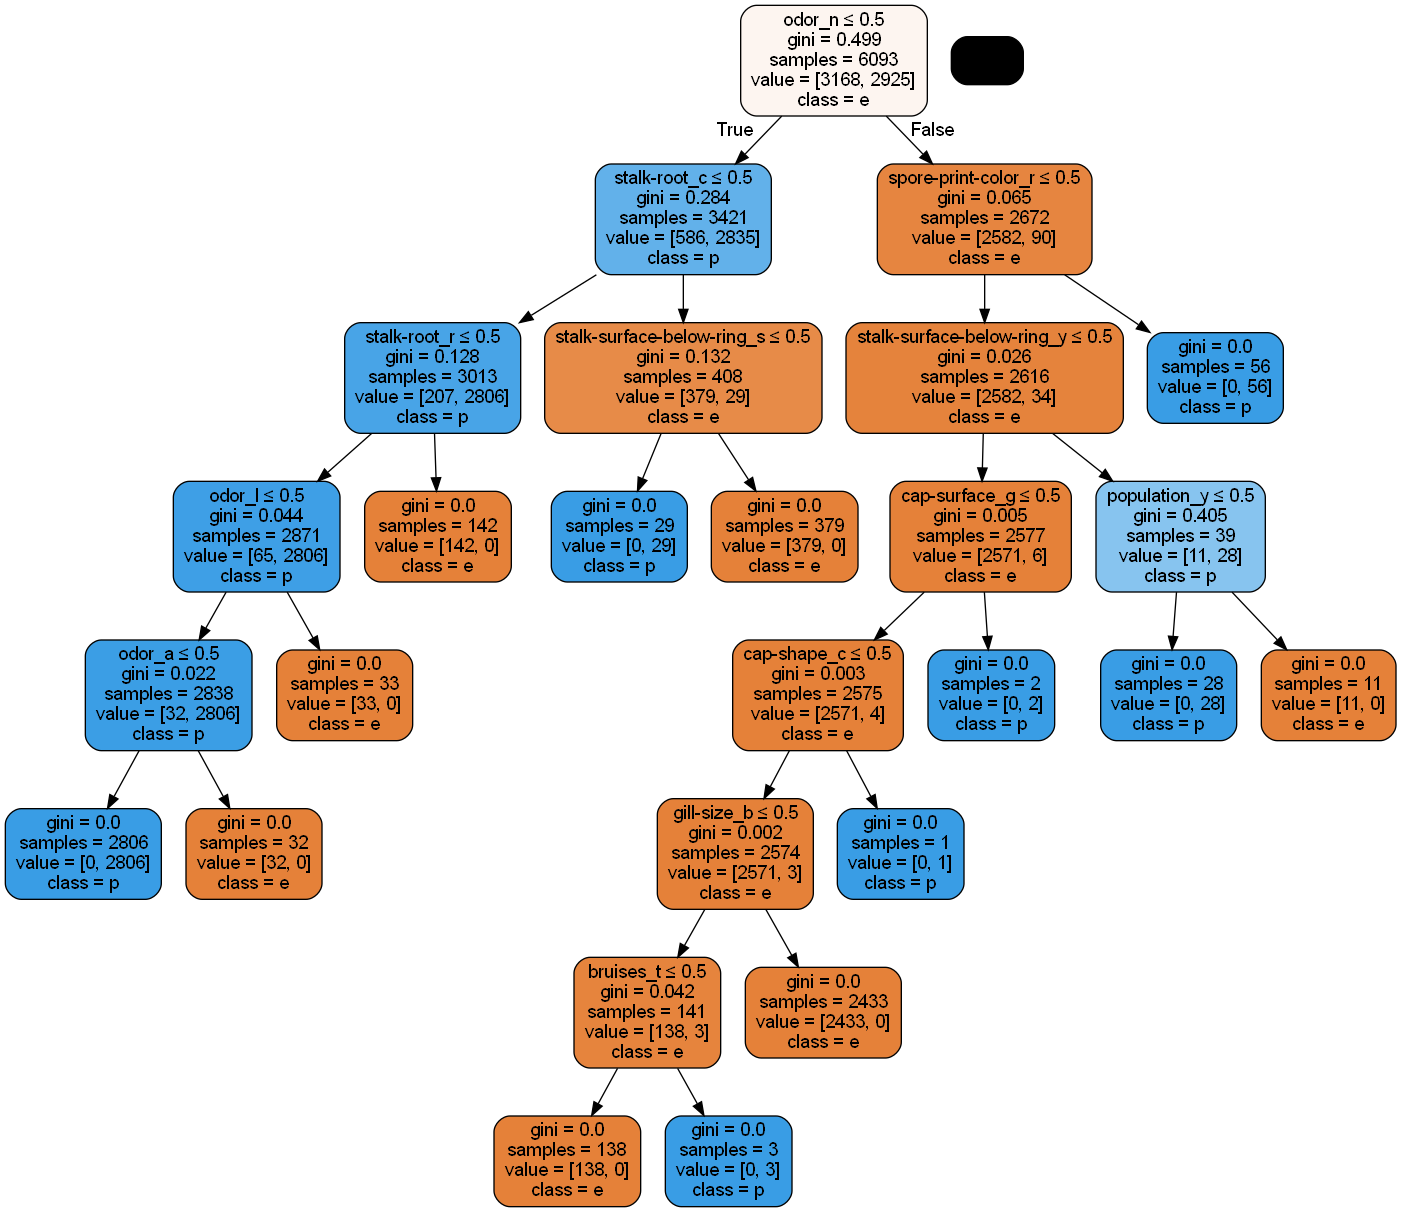

In [113]:
# Create a decision tree graph

# Feature names
feature_names = ohe.get_feature_names_out(input_features=X.columns)
class_names = le.classes_.tolist()

dot_data = tree.export_graphviz(
    dt_model, out_file=None, 
    feature_names=feature_names,  
    class_names=class_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Mushrooms_decision_tree.png')

# Show graph
Image(graph.create_png())

In [114]:
# Test on fictitious data

dff= pd.read_csv("./Resources/fictitious_mushrooms.csv")

y2 = dff['class']

X2 = dff.copy()
X2 = X2.drop(columns='class')

X_fictitious = pd.DataFrame(data=ohe.transform(X2), columns = ohe.get_feature_names_out())
y_fictitious = le.transform(y2)

predictions_fictitious = dt_model.predict(X_fictitious)

accuracy_fict = accuracy_score(y_fictitious, predictions_fictitious)
report_fict = classification_report(y_fictitious, predictions_fictitious)

print(f"Accuracy: {accuracy_fict}")
print(f"Classification Report:\n{report_fict}")


Accuracy: 0.488
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.35      0.40       246
           1       0.50      0.63      0.55       254

    accuracy                           0.49       500
   macro avg       0.48      0.49      0.48       500
weighted avg       0.48      0.49      0.48       500



c:\Users\mckal\anaconda3\envs\AI\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [115]:
# Since the machine learning models are perfect due to nature of dataset, adding noise to training set and re-evaluating models

# Creating function to add noise to our categorical variables
def add_noise_categorical(column, noise_level=0.3):
    # Calculate the number of values to modify
    num_values = len(column)
    num_modifications = int(noise_level * num_values)
    
    # Randomly select indices to modify
    indices_to_modify = np.random.choice(column.index, num_modifications, replace=False)
    
    # For each selected index, randomly select a new value from the column (excluding the current value)
    for index in indices_to_modify:
        possible_values = column.loc[column.index.difference([index])]
        new_value = np.random.choice(possible_values.values)
        column.at[index] = new_value


# Apply to training set 

for column_name in X_train.columns:
    add_noise_categorical(X_train[column_name], noise_level=0.3)        


In [116]:
# Encode X train data with OneHotEncoder

X_noisy_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train), columns = ohe.get_feature_names_out())
X_noisy_train_encoded

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0               0            0            0            0            0   
1               0            0            1            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            1            0            0   
...           ...          ...          ...          ...          ...   
6088            0            0            0            0            0   
6089            0            0            0            1            0   
6090            0            0            1            0            0   
6091            0            0            0            1            0   
6092            0            0            0            1            0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0               1              1              0              0              0   
1               0              1              0              0              0   
2               1              0              0              0              1   
3               1              0              0              0              1   
4               0              0              0              0              1   
...           ...            ...            ...            ...            ...   
6088            1              0              0              1              0   
6089            0              0              0              0              1   
6090            0              0              0              0              1   
6091            0              0              0              1              0   
6092            0              1              0              0              0   

      ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0     ...             1             0             0          1          0   
1     ...             0             1             0          0          1   
2     ...             0             0             1          0          1   
3     ...             0             0             1          0          0   
4     ...             0             1             0          1          0   
...   ...           ...           ...           ...        ...        ...   
6088  ...             0             1             0          0          0   
6089  ...             0             0             0          0          0   
6090  ...             0             0             1          0          0   
6091  ...             0             1             0          0          1   
6092  ...             1             0             0          0          1   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0             0          0          0          0          0  
1             0          0          0          0          0  
2             0          0          0          0          0  
3             0          0          1          0          0  
4             0          0          0          0          0  
...         ...        ...        ...        ...        ...  
6088          0          0          1          0          0  
6089          0          0          0          0          1  
6090          0          0          1          0          0  
6091          0          0          0          0          0  
6092          0          0          0          0          0  

[6093 rows x 117 columns]

In [117]:
# Create the logistic regression classifier model with the noisy data frame and a random_state of 2
lr_noisy_model = LogisticRegression(max_iter = 1000, random_state=2)

# Fit the model to the training data
lr_noisy_model.fit(X_noisy_train_encoded, y_train_encoded)

LogisticRegression(max_iter=1000, random_state=2)

In [118]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % lr_noisy_model.score(X_noisy_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % lr_noisy_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 0.947
Test Accuracy: 0.998


c:\Users\mckal\anaconda3\envs\AI\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [119]:
# Create the support vector machine classifier model with the noisy data frame and a 'poly' kernel
svm_noisy_model = SVC(kernel='poly')

# Fit the model to the training data
svm_noisy_model.fit(X_noisy_train_encoded, y_train_encoded)

SVC(kernel='poly')

In [120]:
# Validate the model by checking the model accuracy with model.score


print('Train Accuracy: %.3f' % svm_model.score(X_noisy_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % svm_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 0.945
Test Accuracy: 1.000


c:\Users\mckal\anaconda3\envs\AI\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [121]:
# Create the KNN model with 9 neighbors with the noisy data frame 
knn_model = KNeighborsClassifier(n_neighbors=9)

# Fit the model to the training data
knn_model.fit(X_noisy_train_encoded, y_train_encoded)

KNeighborsClassifier(n_neighbors=9)

In [122]:
# Validate the model by checking the model accuracy with model.score

# Convert to NumPy arrays and ensure they are C-contiguous
X_noisy_train_encoded = np.ascontiguousarray(X_noisy_train_encoded)


print('Train Accuracy: %.3f' % knn_model.score(X_noisy_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % knn_model.score(X_test_encoded, y_test_encoded))

c:\Users\mckal\anaconda3\envs\AI\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train Accuracy: 0.981


c:\Users\mckal\anaconda3\envs\AI\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 1.000


In [123]:
# Create the decision tree classifier model with the noisy data frame
dt_noisy_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_noisy_model.fit(X_noisy_train_encoded, y_train_encoded)

DecisionTreeClassifier()

In [124]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % dt_noisy_model.score(X_noisy_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % dt_noisy_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [125]:
# Create the random forest classifier model with the noisy data frame
# with n_estimators=128 and random_state=3
rf_noisy_model = RandomForestClassifier(n_estimators=128, random_state=3)

# Fit the model to the training data
rf_noisy_model.fit(X_noisy_train_encoded, y_train_encoded)

RandomForestClassifier(n_estimators=128, random_state=3)

In [126]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % rf_noisy_model.score(X_noisy_train_encoded, y_train_encoded))
print('Test Accuracy: %.3f' % rf_noisy_model.score(X_test_encoded, y_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [127]:
# Decision tree graph of noisy model 

# Feature names
noisy_feature_names = ohe.get_feature_names_out(input_features=X.columns)
noisy_class_names = le.classes_.tolist()

noisy_dot_data = tree.export_graphviz(
    dt_noisy_model, out_file=None, 
    feature_names=noisy_feature_names,  
    class_names=noisy_class_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph_noisy = pydotplus.graph_from_dot_data(noisy_dot_data)
graph_noisy.write_png('Mushrooms_noisy_decision_tree.png')

# Show graph
Image(graph_noisy.create_png())



(process:31128): GLib-GIO-WARNING **: 20:52:39.944: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2312.33.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:31128): GLib-GIO-WARNING **: 20:52:39.990: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.9.1.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


(process:17924): GLib-GIO-WARNING **: 20:52:45.644: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2312.33.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:17924): GLib-GIO-WARNING **: 20:52:45.677: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.9.1.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



In [128]:
# Creating a simplified dataset

# Features minus classes not in original DT

X_simplified = df.copy()
X_simplified = X_simplified.drop(columns=['class','cap-color','gill-attachment','gill-spacing','gill-color','stalk-shape','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','population','habitat'])
X_simplified.head()



cap-shape cap-surface bruises odor gill-size stalk-root  \
0         x           s       t    p         n          e   
1         x           s       t    a         b          c   
2         b           s       t    l         b          c   
3         x           y       t    p         n          e   
4         x           s       f    n         b          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s                        s                      w   
2                        s                        s                      w   
3                        s                        s                      w   
4                        s                        s                      w   

  spore-print-color  
0                 k  
1                 n  
2                 n  
3                 k  
4                 n

In [129]:
# Split data into training and testing sets

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_simplified, y, random_state = 42)

In [130]:
# Encode target class

y_s_train_encoded = le.fit_transform(y_s_train)
y_s_test_encoded = le.transform(y_test)
y_train_encoded

array([1, 1, 0, ..., 0, 1, 0])

In [131]:
#Encode X classes with OHE

X_s_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_s_train), columns = ohe.get_feature_names_out())
X_s_test_encoded = pd.DataFrame(data=ohe.transform(X_s_test), columns=ohe.get_feature_names_out())
X_s_train_encoded

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0               0            0            0            0            0   
1               0            0            1            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            1            0            0   
...           ...          ...          ...          ...          ...   
6088            0            0            0            0            0   
6089            0            0            0            1            0   
6090            0            0            1            0            0   
6091            0            0            0            1            0   
6092            0            0            0            1            0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0               1              0              0              1              0   
1               0              1              0              0              0   
2               1              0              0              0              1   
3               1              0              0              0              1   
4               0              0              0              0              1   
...           ...            ...            ...            ...            ...   
6088            1              0              0              0              1   
6089            0              0              0              0              1   
6090            0              0              0              0              1   
6091            0              0              0              1              0   
6092            0              1              0              0              0   

      ...  stalk-color-above-ring_y  spore-print-color_b  spore-print-color_h  \
0     ...                         0                    0                    0   
1     ...                         0                    0                    1   
2     ...                         0                    0                    0   
3     ...                         0                    0                    1   
4     ...                         0                    0                    0   
...   ...                       ...                  ...                  ...   
6088  ...                         0                    0                    0   
6089  ...                         0                    0                    0   
6090  ...                         0                    0                    0   
6091  ...                         0                    0                    0   
6092  ...                         0                    0                    0   

      spore-print-color_k  spore-print-color_n  spore-print-color_o  \
0                       0                    1                    0   
1                       0                    0                    0   
2                       1                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
...                   ...                  ...                  ...   
6088                    0                    0                    0   
6089                    0                    0                    0   
6090                    0                    1                    0   
6091                    0                    0                    0   
6092                    0                    0                    0   

      spore-print-color_r  spore-print-color_u  spore-print-color_w  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    0   
3                       0                    0

In [132]:
# Create the logistic regression classifier model with a random_state of 5
lr_s_model = LogisticRegression(random_state=5)

# Fit the model to the training data
lr_s_model.fit(X_s_train_encoded, y_s_train_encoded)

LogisticRegression(random_state=5)

In [133]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % lr_s_model.score(X_s_train_encoded, y_s_train_encoded))
print('Test Accuracy: %.3f' % lr_s_model.score(X_s_test_encoded, y_s_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [134]:
# Create the support vector machine classifier model with a 'poly' kernel
svm_s_model = SVC(kernel='poly')

# Fit the model to the training data
svm_s_model.fit(X_s_train_encoded, y_s_train_encoded)

SVC(kernel='poly')

In [135]:
# Validate the model by checking the model accuracy with model.score


print('Train Accuracy: %.3f' % svm_s_model.score(X_s_train_encoded, y_s_train_encoded))
print('Test Accuracy: %.3f' % svm_s_model.score(X_s_test_encoded, y_s_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [136]:
# Create the KNN model with 9 neighbors
knn_s_model = KNeighborsClassifier(n_neighbors=9)

# Fit the model to the training data
knn_s_model.fit(X_s_train_encoded, y_s_train_encoded)

KNeighborsClassifier(n_neighbors=9)

In [137]:
# Validate the model by checking the model accuracy with model.score

# Convert to NumPy arrays and ensure they are C-contiguous
X_s_train_encoded = np.ascontiguousarray(X_s_train_encoded)
y_s_train_encoded = np.ascontiguousarray(y_s_train_encoded)
X_s_test_encoded = np.ascontiguousarray(X_s_test_encoded)
y_s_test_encoded = np.ascontiguousarray(y_s_test_encoded)

print('Train Accuracy: %.3f' % knn_s_model.score(X_s_train_encoded, y_s_train_encoded))
print('Test Accuracy: %.3f' % knn_s_model.score(X_s_test_encoded, y_s_test_encoded))

c:\Users\mckal\anaconda3\envs\AI\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train Accuracy: 1.000


c:\Users\mckal\anaconda3\envs\AI\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 1.000


In [138]:
# Create the decision tree classifier model
dt_s_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_s_model.fit(X_s_train_encoded, y_s_train_encoded)

DecisionTreeClassifier()

# For Lex Bot

In [143]:
import pickle
filename='mymodel.sav'
pickle.dump(dt_s_model,open(filename,'wb'))

In [139]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % dt_s_model.score(X_s_train_encoded, y_s_train_encoded))
print('Test Accuracy: %.3f' % dt_s_model.score(X_s_test_encoded, y_s_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


In [140]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_s_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_s_model.fit(X_s_train_encoded, y_s_train_encoded)

RandomForestClassifier(n_estimators=128, random_state=1)

In [141]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % rf_s_model.score(X_s_train_encoded, y_s_train_encoded))
print('Test Accuracy: %.3f' % rf_s_model.score(X_s_test_encoded, y_s_test_encoded))

Train Accuracy: 1.000
Test Accuracy: 1.000


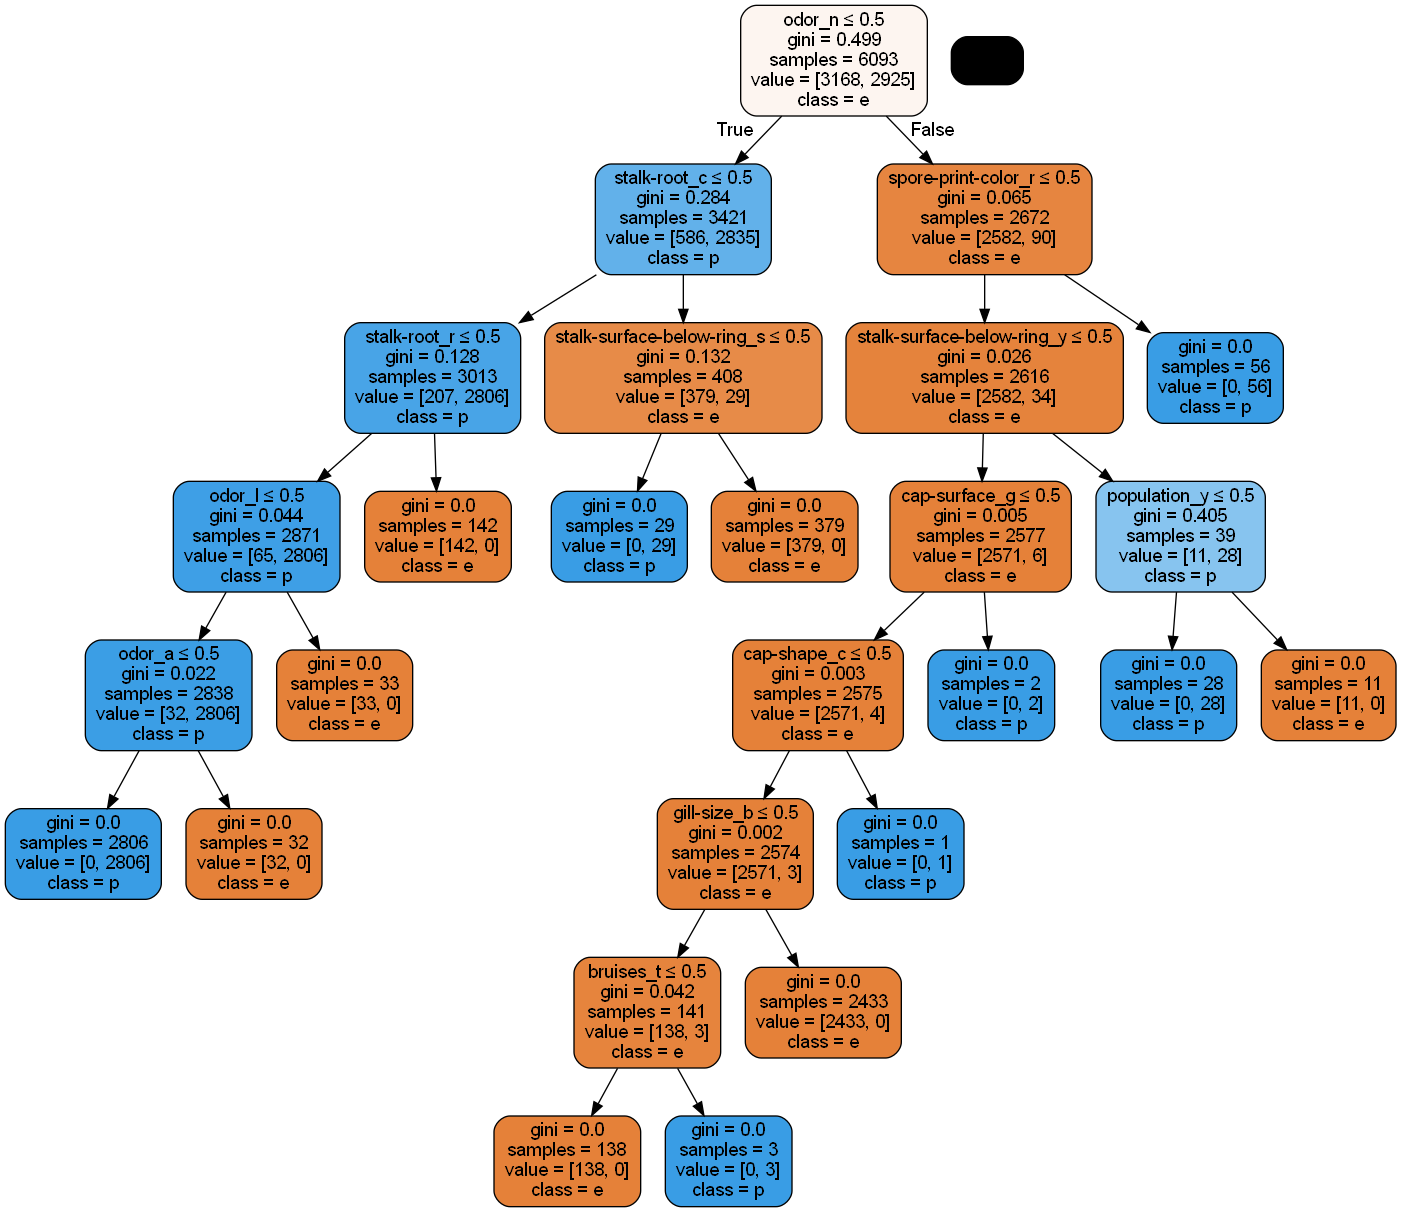

In [142]:
# Create a decision tree graph for simplified dt model

# Feature names
s_feature_names = ohe.get_feature_names_out(input_features=X_simplified.columns)
s_class_names = le.classes_.tolist()

s_dot_data = tree.export_graphviz(
    dt_s_model, out_file=None, 
    feature_names=s_feature_names,  
    class_names=s_class_names,  
    filled=True, rounded=True,  
    special_characters=True)  

s_graph = pydotplus.graph_from_dot_data(dot_data)
s_graph.write_png('Mushrooms_simplified_decision_tree.png')

# Show graph
Image(graph.create_png())